# Music Genre Classifier
--- 
## Imports:

In [132]:
# Usual Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython.display import Audio, display

# Librosa - for audio and music processing
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

print("Succesfully imported libraries")

Succesfully imported libraries


In [20]:
# Download Dataset:

import kagglehub
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\janmi\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


### The Data Folder contains:

* **genres original folder** (collection of 10 genres - each with 100 thirty second long audio files)
* **images original folder** (visual representation for each audio file)
* **features_30_seconds.csv file**  (containing features of the audio files)
* **features_3_seconds.csv file**   (same structure - but this time the songs were split into 3-second parts -> More Data) 

In [15]:
print(list(os.listdir(f'{path}\Data')))

['features_30_sec.csv', 'features_3_sec.csv', 'genres_original', 'images_original']


---

## Explore Audio Data

In [140]:
# Import one file...
file_path = f'{path}\\Data\\genres_original\\blues\\blues.00014.wav'
y, sr = librosa.load(file_path)

if os.path.exists(file_path):
    #print(f'Play Audio: {file_path}')
    display(Audio(file_path))


print('y: ', y, '\n')
print('y shape: ', np.shape(y), '\n')
print('Sample Rate (KHz): ', sr, '\n')

print("Length of Audio(samples/samplerate): ", 661794/sr, "sec")

y:  [0.07705688 0.11590576 0.09234619 ... 0.07122803 0.06323242 0.04721069] 

y shape:  (661794,) 

Sample Rate (KHz):  22050 

Length of Audio(samples/samplerate):  30.013333333333332 sec


In [134]:
# Trim silence in the beginning an end:
audio_file, _ = librosa.effects.trim(y)

print("Audio File: ", audio_file, "\n")
print("Audio File shape: ", np.shape(audio_file))

Audio File:  [0.07705688 0.11590576 0.09234619 ... 0.07122803 0.06323242 0.04721069] 

Audio File shape:  (661794,)


## 2D Representation:

Text(0.5, 1.0, 'Sound waves in Blues.00014.wav')

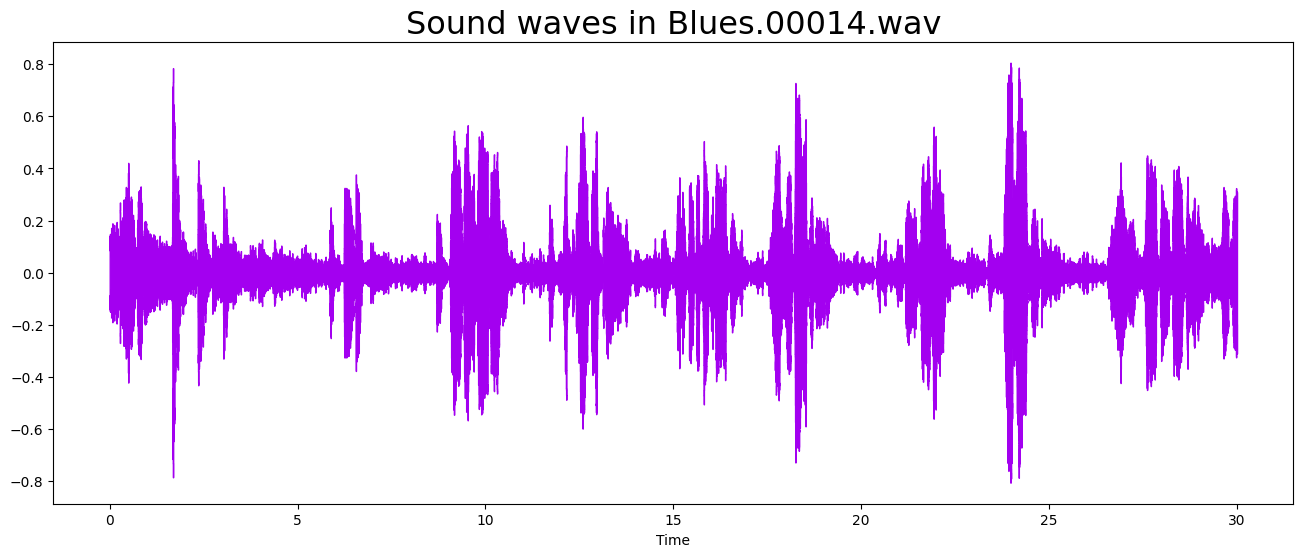

In [43]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F0");
plt.title("Sound waves in Blues.00014.wav", fontsize=23)

### Fourier Transform:

* integral transform that takes a signal function as input and outputs another function that describes the extent to which various frequencies are present in the input function

* The transform contains both the y-axis(frequency) to log scale and the "color" axis (amplitude)

In [46]:
n_fft = 2048
hop_length = 512

# Short-time Fourier transform
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

print("Shape of D object: ", np.shape(D))



Shape of D object:  (1025, 1293)


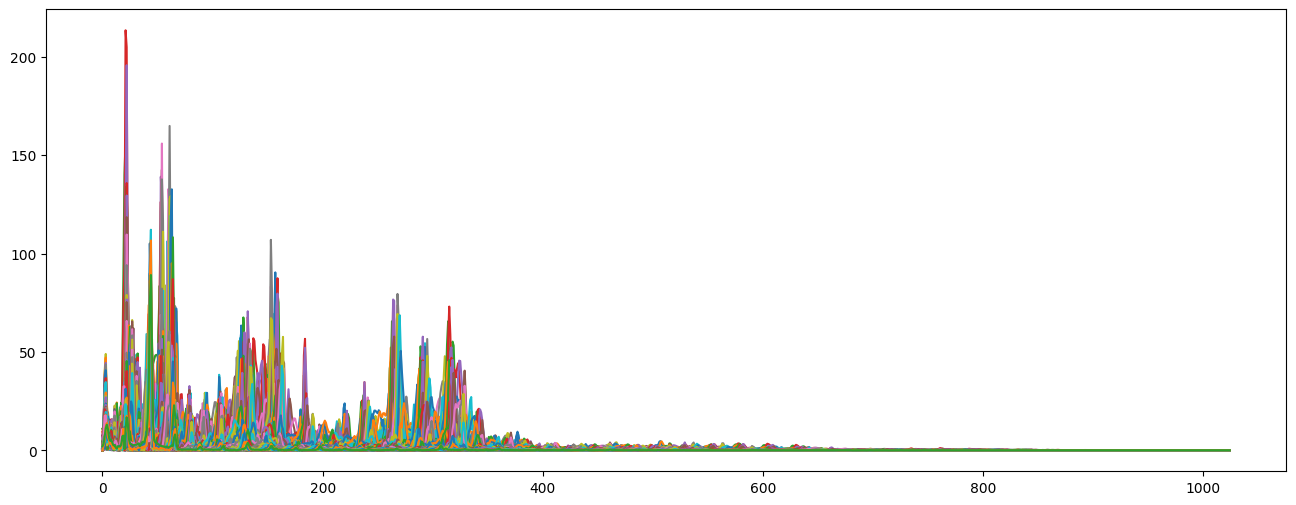

In [52]:
plt.figure(figsize=(16,6))
plt.plot(D);

### FFT-Spectogram:

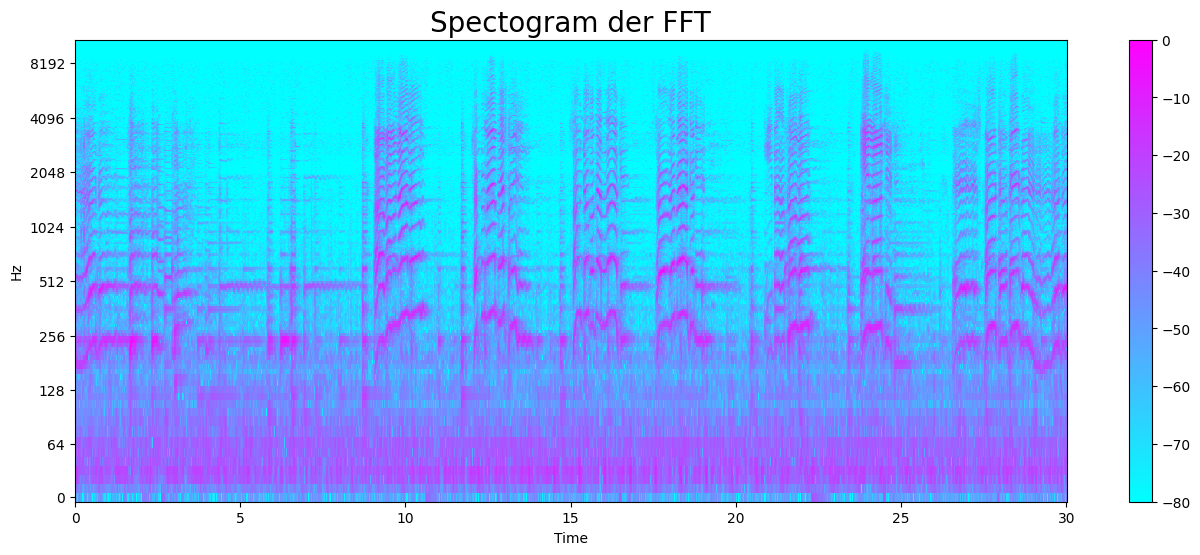

In [ ]:
# Convert amplitude spectrogram to decibel-scaled spectogram
DB = librosa.amplitude_to_db(D, ref = np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(DB, y_axis='log', x_axis='time', sr=sr, hop_length=hop_length, cmap= 'cool')
plt.title('Spectogram der FFT', fontsize=20)
plt.colorbar();
plt.show()

### Mel Spectogram

Text(0.5, 1.0, 'Mel Spectogram')

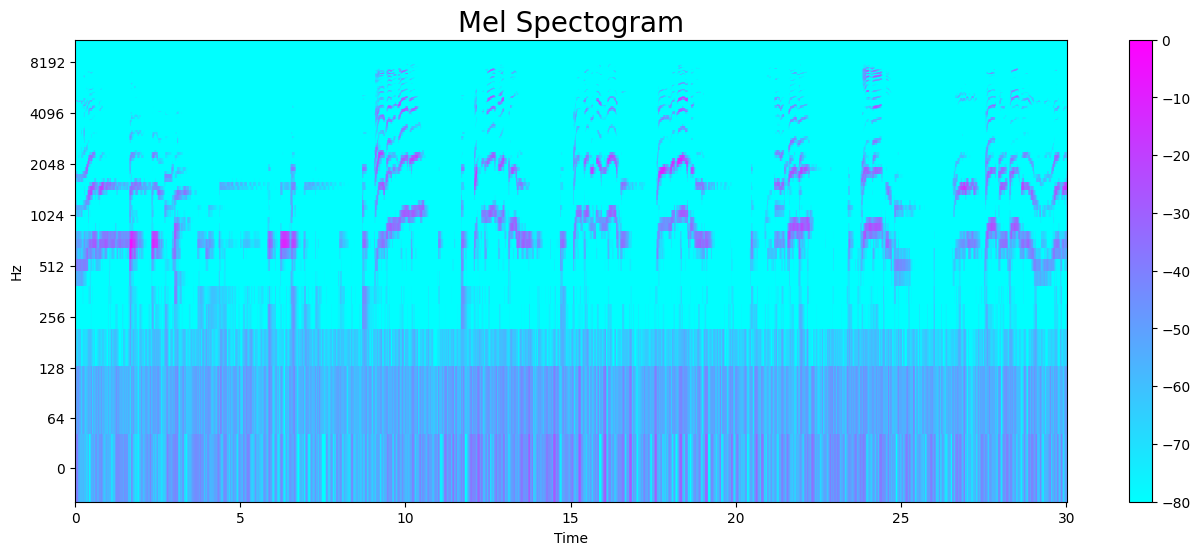

In [85]:
y_trim, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y_trim, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', cmap='cool');
plt.colorbar();
plt.title('Mel Spectogram', fontsize=20)

## Audio Features

### Zero Crossing Rate

* the rate at which the signal changes between positive and negative

In [93]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print("Zero Crossings: ", sum(zero_crossings))

Zero Crossings:  29848


### Harmonics and Perceptrual

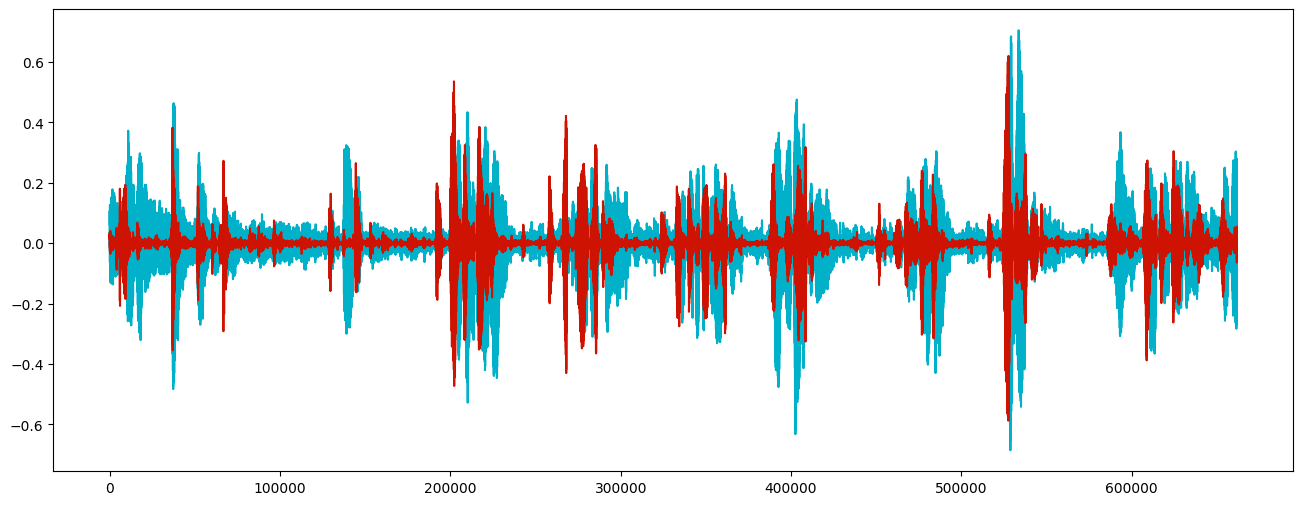

In [100]:
y_harmonic, y_perceptrual = librosa.effects.hpss(audio_file)

plt.figure(figsize=(16,6))
plt.plot(y_harmonic, color="#00B1C9");
plt.plot(y_perceptrual, color="#CF1302")

### BPM (Tempo)

In [103]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print("Tempo in BPM:", tempo)

Tempo in BPM: [151.99908088]


### Spectral Centroid

* a measure used in digital signal processing to characterise a spectrum
* indicates where the center of mass of the spectrum is located 
* perceptually, it has a robust connection with the impression of brightness of a sound

In [111]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

print('Centroids: ', spectral_centroids, '\n')
print('Shape of Spectral Centroids: ', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames: ', frames, '\n')
print('t: ', t)

# Normalize Sound Data Function
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids:  [1293.29055131 1073.68120637 1046.09452531 ... 1012.97491477  971.62397679
  856.50461324] 

Shape of Spectral Centroids:  (1293,) 

frames:  range(0, 1293) 

t:  [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


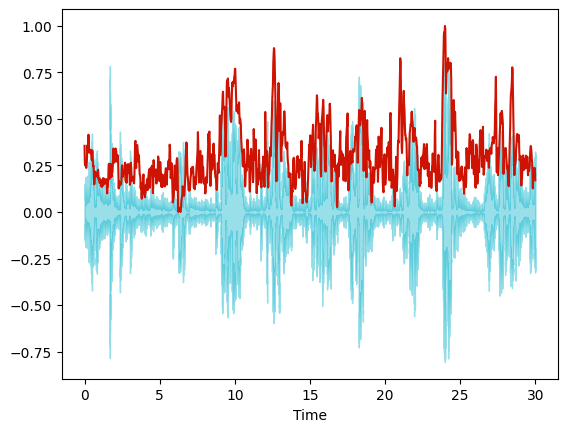

In [118]:
plt.Figure(figsize=(16,6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#00B1C9');
plt.plot(t, normalize(spectral_centroids), color='#CF1302' );


### Spectral Rollof

* The spectral roll-off point is defined as the frequency below which a specified proportion of the total energy of the spectrum is contained

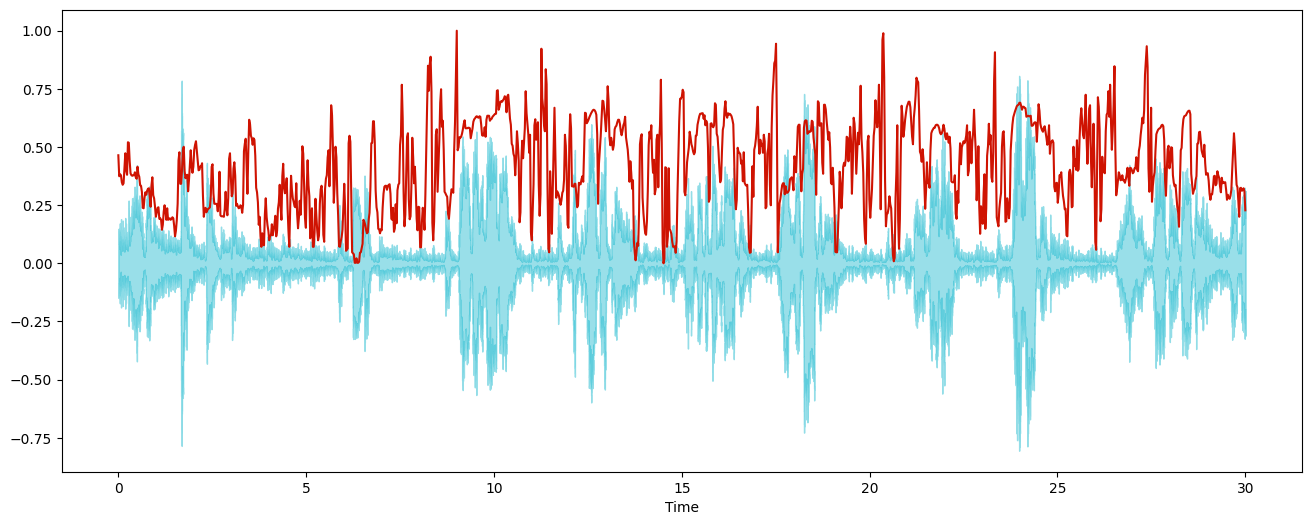

In [121]:
spectral_rollof = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color='#00B1C9')
plt.plot(t, normalize(spectral_rollof), color='#CF1302')

### Mel-Frequency Cepstral Coefficients (MFCCs):

* The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape:  (20, 1293)


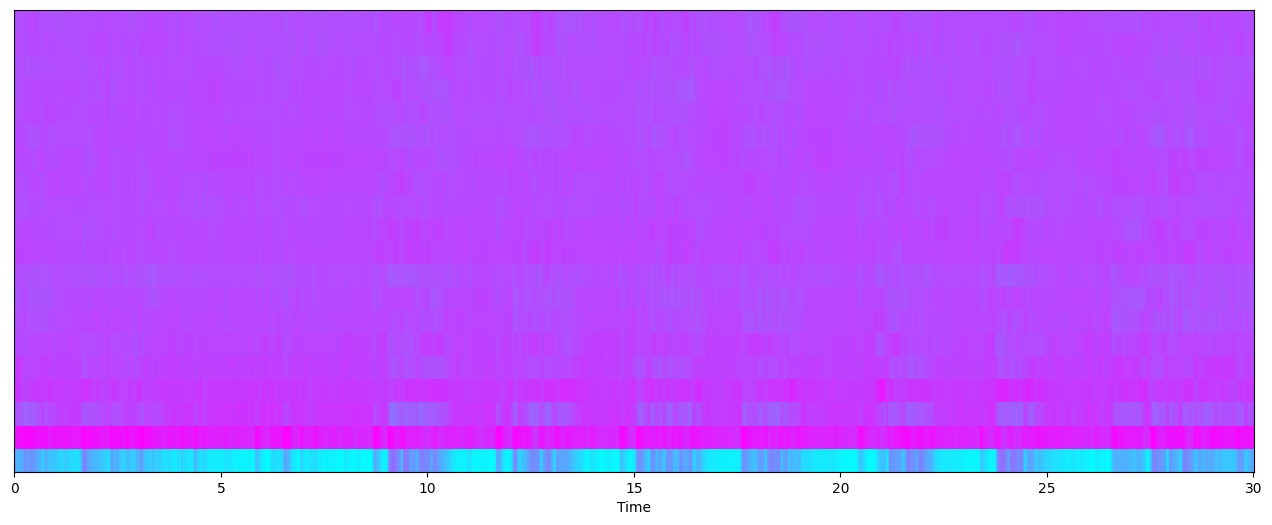

In [123]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape: ', mfccs.shape)

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')

#### ... scale data

Mean:  1.1801075e-09 

Var:  1.0


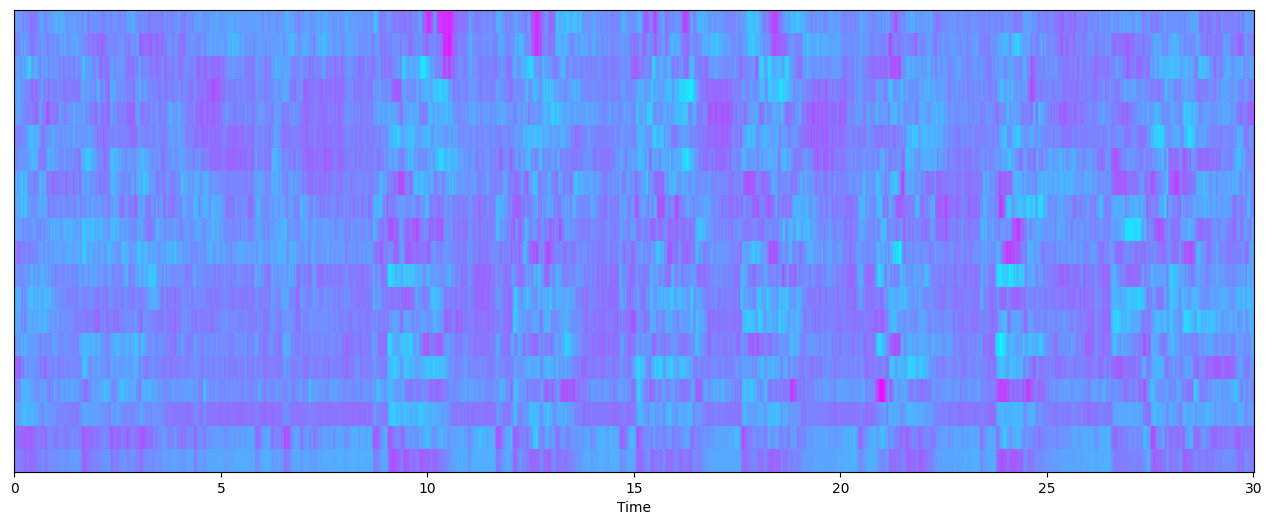

In [125]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean: ', mfccs.mean(), '\n')
print('Var: ', mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool');

### Chroma STFT / Chroma Frequencies

* Chroma-STFT is a methode of calculating chroma-characteristics from an audio-signal
* Short-Term-Fourier-Transform is applied
* Data is assigned to the 12 pitches (C-B)


Chromagra shape:  (12, 133)


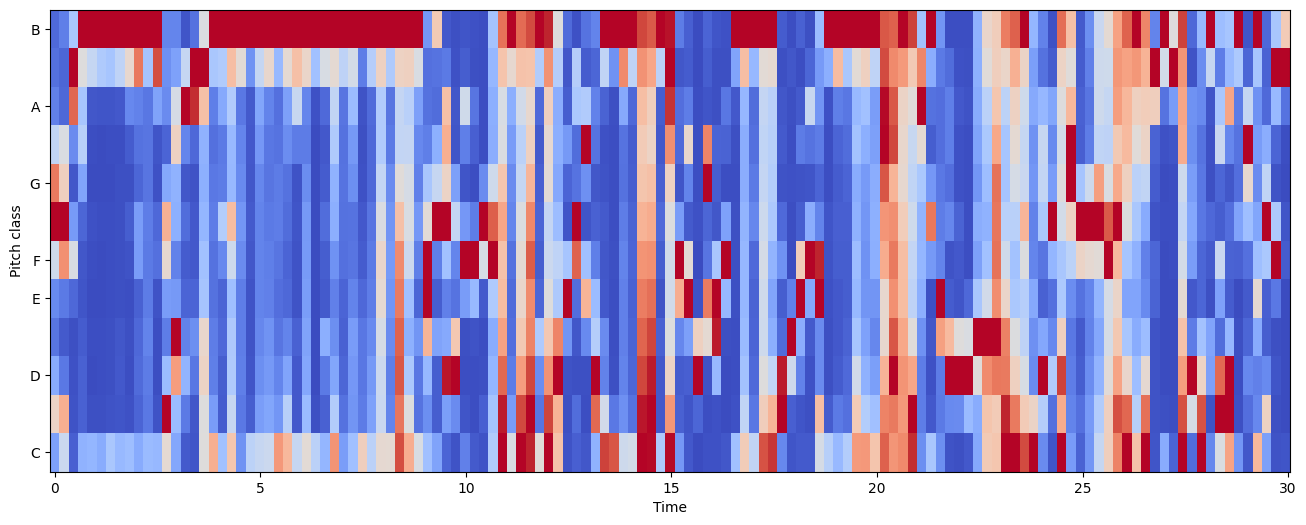

In [130]:
# Adjust hop_length to change how granular you want your data to be
hop_length = 5000

chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromagra shape: ', chromagram.shape)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

---
# Exploratory Data Analysis (EDA)

EDA is going to be performed on the features_30_sec.csv. This file contains the mean and variance for each audio file fo the features analysed above.

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [145]:
data = pd.read_csv(f'{path}\\Data\\features_30_sec.csv')
data.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


## Correlation Heatmap for feature means

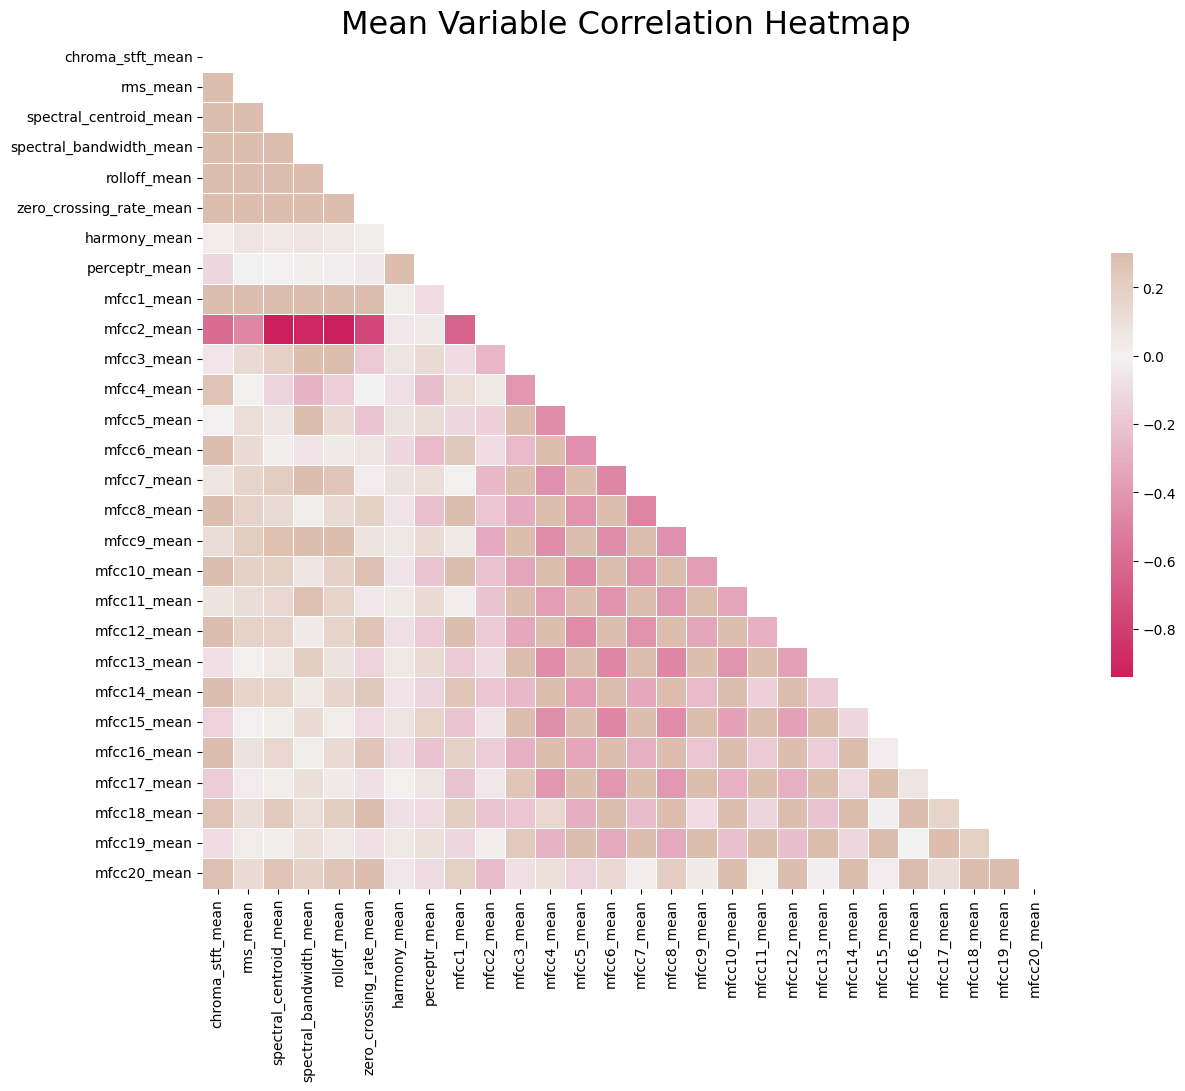

In [147]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(16,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=45)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Mean Variable Correlation Heatmap', fontsize = 23)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('corr heatmap.jpg')


## Box Plot for Genre Distributions

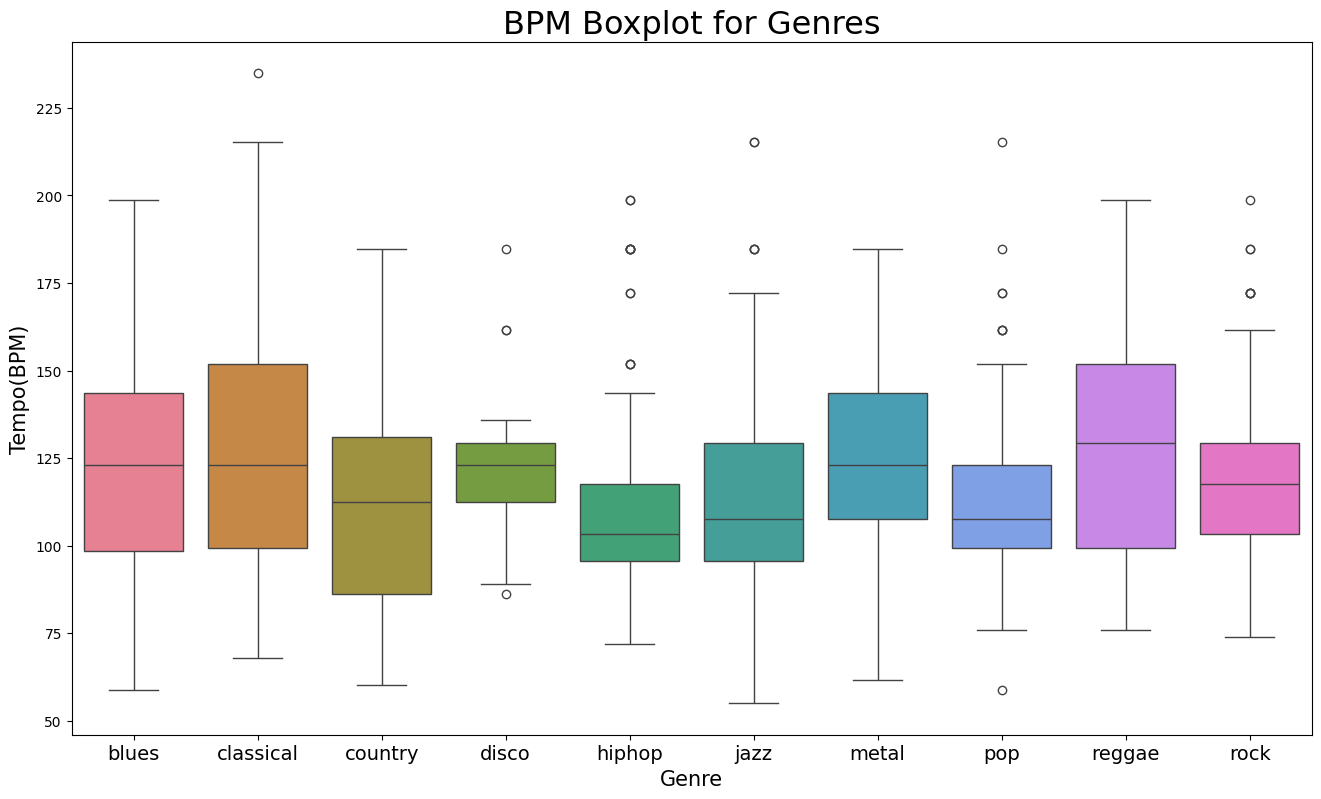

In [154]:
x = data[['label', 'tempo']]

f, ax = plt.subplots(figsize=(16,9));
sns.boxplot(x='label', y='tempo', data=x, palette='husl');

plt.title('BPM Boxplot for Genres', fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Tempo(BPM)', fontsize=15)
plt.savefig('BPM boxplot.jpg')

## Principal Component Analysis (PCA)

1. Normalization

2. PCA

3. The Scatter Plot

* unsupervised technique of linear algebra, used to reduce the dimensionality of a data set while preserving as much information (varianace) as possible

In [ ]:
from sklearn import preprocessing

# Delete first column of dataset, which includes only ID which in unnecessary here
data = data.iloc[0:, 1:] 
y = data['label']                   
X = data.loc[:, data.columns != 'label'] 

# 1. Normalize X (MinMaxScaler)
cols = X.columns                                # save names of feature columns
min_max_scaler = preprocessing.MinMaxScaler()   
np_scaled = min_max_scaler.fit_transform(X)     # calculate the scale factors and applies them to the feature-data
X = pd.DataFrame(np_scaled, columns=cols)       # Converts scaled NumPy-array back into pandas dataframe

# 2. PCA Components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components =pca.fit_transform(X)      # perform PCA: fit->learns optimal directions and transform->project X-data onto the new axes
principalDf = pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis=1)

pca.explained_variance_ratio_
